In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

### Part 2: Loan Default Prediction Task
Objective: Build a machine learning model to predict loan defaults using the provided dataset, data/Part 2.loan_data_final.csv. 

There is no starting code provided, so follow best practices and cover each step in the process. 

Note that model performance is not the top concern due to time constraints; focus on demonstrating a solid workflow.
### Instructions
Data Exploration: Load and inspect the data, handle any missing values, and clean as needed.

Feature Engineering: Create or transform features to improve model performance, and prepare categorical and numerical variables.

Model Training: Select and train a model, split the data into training and test sets, and evaluate model performance.

Documentation: Summarize your approach, key decisions, and findings.
The primary focus is on your workflow and approach. Reach out with any questions, and good luck!

In [128]:
loan_data = pd.read_csv('/Users/kyawswaryemyint/Desktop/Code-Assessment/Coding-Assess-main/data/Part 2. loan_data_final.csv')
loan_data

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_to_income_ratio,loan_type,dependents_count,regional_unemployment_rate,borrower_risk_score,loan_status
0,0,22,female,Master,71948,0,RENT,PERSONAL,16.02,0.49,3,561,No,0.49,FLOATING,3,6.84,281.4,1
1,1,21,female,High School,12282,0,OWN,EDUCATION,11.14,0.08,2,504,Yes,0.08,FIXED,0,5.96,252.4,0
2,2,25,female,High School,12438,3,MORTGAGE,MEDICAL,12.87,0.44,3,635,No,0.44,FIXED,0,6.69,318.4,1
3,3,23,female,Bachelor,79753,0,RENT,MEDICAL,15.23,0.44,2,675,No,0.44,FIXED,3,7.63,338.1,1
4,4,24,male,Master,66135,1,RENT,MEDICAL,14.27,0.53,4,586,No,0.53,FLOATING,0,4.63,294.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,44995,27,male,Associate,47971,6,RENT,MEDICAL,15.66,0.31,3,645,No,0.31,FIXED,0,6.53,323.4,1
44996,44996,37,female,Associate,65800,17,RENT,HOMEIMPROVEMENT,14.07,0.14,11,621,No,0.14,FIXED,2,4.33,313.8,1
44997,44997,33,male,Associate,56942,7,RENT,DEBTCONSOLIDATION,10.02,0.05,10,668,No,0.05,FLOATING,0,6.66,337.0,1
44998,44998,29,male,Bachelor,33164,4,RENT,EDUCATION,13.23,0.36,6,604,No,0.36,FIXED,0,6.80,303.8,1


In [129]:
loan_data_train = pd.read_csv('/Users/kyawswaryemyint/Desktop/Code-Assessment/Coding-Assess-main/data/Part 2. loan_data_final.csv')
loan_data_test = pd.read_csv('/Users/kyawswaryemyint/Desktop/Code-Assessment/Coding-Assess-main/data/Part 2. loan_data_final.csv')
gc.collect()

12406

In [130]:
print("The type of data that is present based on different features is:")
loan_data_train.dtypes.value_counts()

The type of data that is present based on different features is:


int64      8
object     6
float64    5
dtype: int64

In [131]:
loan_data_train.shape

(45000, 19)

In [132]:
loan_data_train.select_dtypes('object').head()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_type
0,female,Master,RENT,PERSONAL,No,FLOATING
1,female,High School,OWN,EDUCATION,Yes,FIXED
2,female,High School,MORTGAGE,MEDICAL,No,FIXED
3,female,Bachelor,RENT,MEDICAL,No,FIXED
4,male,Master,RENT,MEDICAL,No,FLOATING


In [133]:
loan_data.head(), loan_data.info(), loan_data.describe(), loan_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      45000 non-null  int64  
 1   person_age                      45000 non-null  int64  
 2   person_gender                   45000 non-null  object 
 3   person_education                45000 non-null  object 
 4   person_income                   45000 non-null  int64  
 5   person_emp_exp                  45000 non-null  int64  
 6   person_home_ownership           45000 non-null  object 
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

(   Unnamed: 0  person_age person_gender person_education  person_income  \
 0           0          22        female           Master          71948   
 1           1          21        female      High School          12282   
 2           2          25        female      High School          12438   
 3           3          23        female         Bachelor          79753   
 4           4          24          male           Master          66135   
 
    person_emp_exp person_home_ownership loan_intent  loan_int_rate  \
 0               0                  RENT    PERSONAL          16.02   
 1               0                   OWN   EDUCATION          11.14   
 2               3              MORTGAGE     MEDICAL          12.87   
 3               0                  RENT     MEDICAL          15.23   
 4               1                  RENT     MEDICAL          14.27   
 
    loan_percent_income  cb_person_cred_hist_length  credit_score  \
 0                 0.49                      

### From above, we see that there are no missing values across any of the columns, which simplifies preprocessing. Also, the 'Unnamed:0' column is an index so we can drop it.

In [97]:
loan_data = loan_data.drop(columns=['Unnamed: 0'])

# Identify categorical columns
categorical_columns = loan_data.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(loan_data[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Combine the encoded dataframe with the original data (excluding original categorical columns)
loan_data_encoded = pd.concat([loan_data.drop(columns=categorical_columns), encoded_df], axis=1)

# Define features and target
X = loan_data_encoded.drop('loan_status', axis=1)
y = loan_data_encoded['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8094444444444444
Confusion Matrix:
 [[6632  358]
 [1357  653]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      6990
           1       0.65      0.32      0.43      2010

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.78      9000



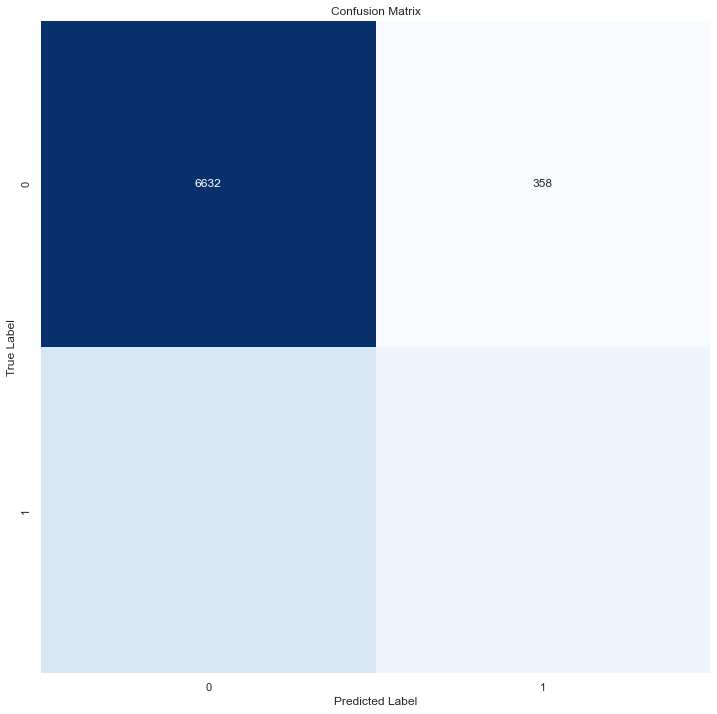

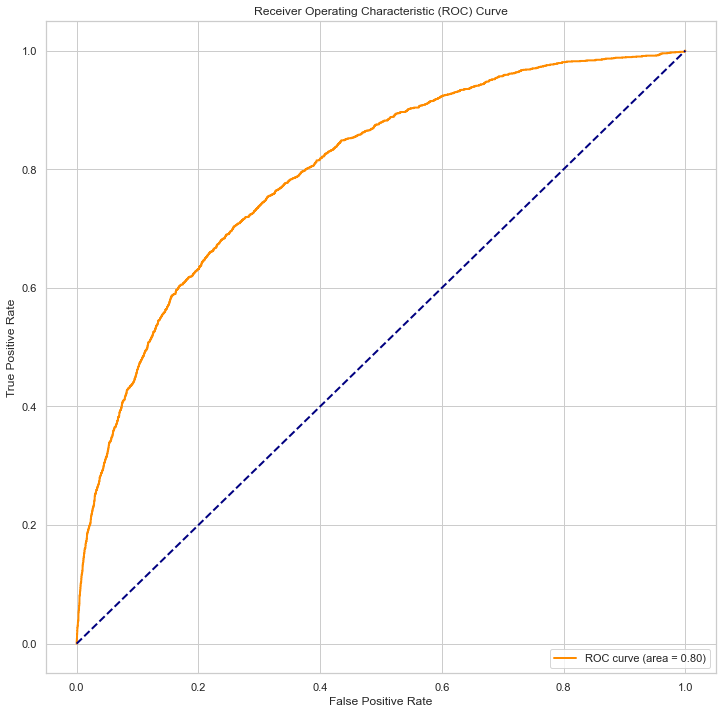

In [98]:
sns.set(style="whitegrid")

# Confusion Matrix Visualization
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


y_probs = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

From the confusion matrix, we can see that there are:

--6632 True Negatives, meaning that the model correctly predicted the non-default cases.
--358 False Positives, meaning that the model incorrectly predicted defaults where there were none.
--653 True Positives, meaning that the model correctly identified actual defaults.
--1357 False Negatives, meaning that the model failed to identify these actual defaults.

The high number of true negatives and relatively low number of true positives highlight that while the model is proficient in predicting non-defaults (high specificity), it struggles with accurately identifying defaults (low sensitivity).

### ROC Curve

The curve is closer to the top-left corner of the plot, which indicates a better overall performance than random guessing.
We have an AUC value of roughly 0.74, which indicates a good predictive performance of the model. 

The visuals underscore the model's conservative approach in predicting defaults, reflected in its higher accuracy for non-defaults and lower sensitivity for defaults. 

### Next Steps:

As such, because the model struggled with default predictions, we can apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. We will also tune hyperparameters of Logistic Regression, and also try the Random Forest algorithm, which may better handle complex patterns and imbalances. To improve the stabiility of the model, we will scale the features.

In [99]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_resampled_scaled, y_resampled)

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, conf_matrix_rf, classification_rep_rf

(0.9212222222222223,
 array([[6695,  295],
        [ 414, 1596]]),
 '              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95      6990\n           1       0.84      0.79      0.82      2010\n\n    accuracy                           0.92      9000\n   macro avg       0.89      0.88      0.88      9000\nweighted avg       0.92      0.92      0.92      9000\n')

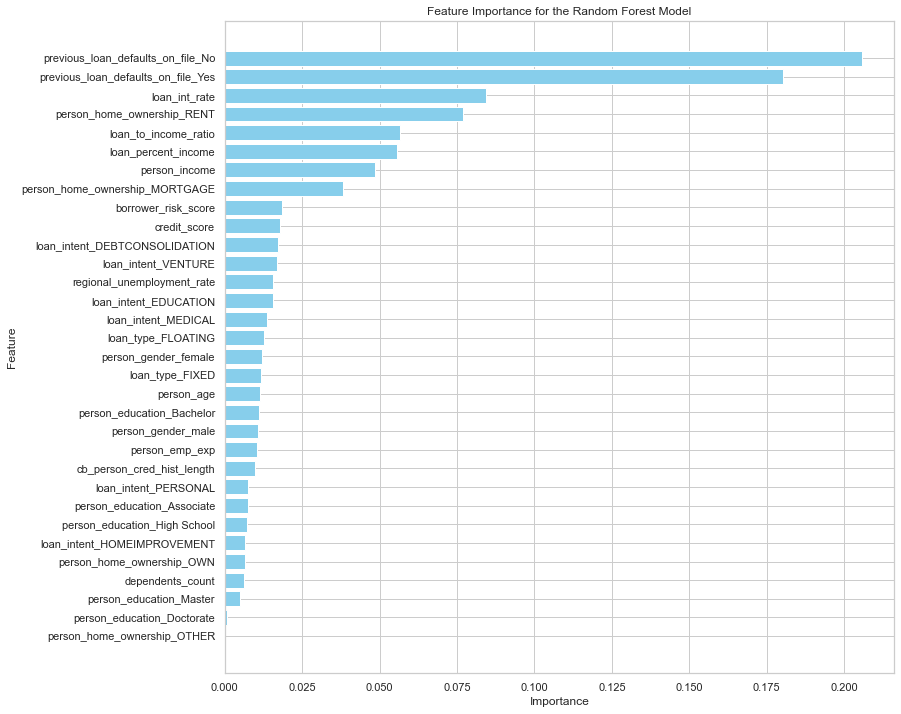

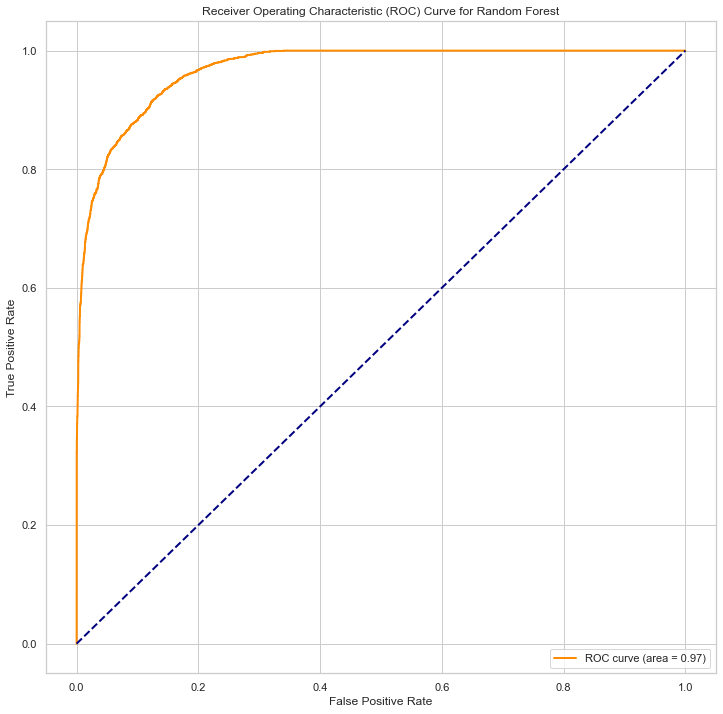

In [101]:
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for the Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


y_probs_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(12, 12))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

From the Confusion Matrix, we are seeing 6695 TNs, an increase from the Logistic Regression model, while the FPs, FNs, and TPs stayed the same. The accuracy of predictions also improved to 92.12%.

### Classification Report:

Precision for Non-defaults (0): 94% - High proportion of correctly predicted non-defaults.
Recall for Non-defaults (0): 96% - Most non-defaults are correctly identified.
F1-score for Non-defaults (0): 95% - Indicates a good balance between precision and recall.
Precision for Defaults (1): 84% - 84% of predicted defaults are actual defaults.
Recall for Defaults (1): 79% - 79% of actual defaults were correctly identified.
F1-score for Defaults (1): 82% - Represents a good balance of precision and recall for the default class.

### Next Steps:
Now, lets see if doing group based bining within loan_intent improves model accuracy and allows us to uncover patterns.

Accuracy: 0.9407777777777778
Confusion Matrix:
 [[6830  160]
 [ 373 1637]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      6990
           1       0.91      0.81      0.86      2010

    accuracy                           0.94      9000
   macro avg       0.93      0.90      0.91      9000
weighted avg       0.94      0.94      0.94      9000



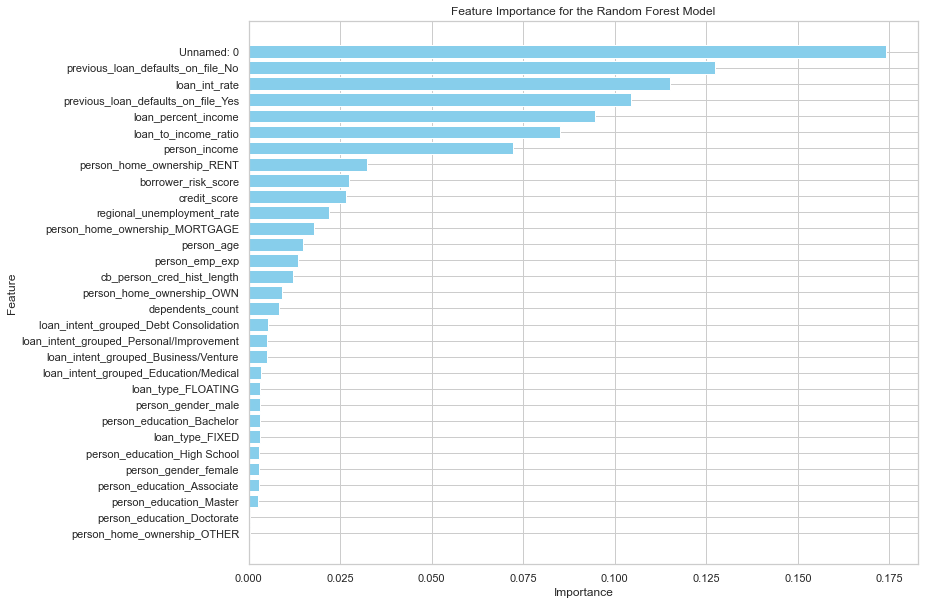

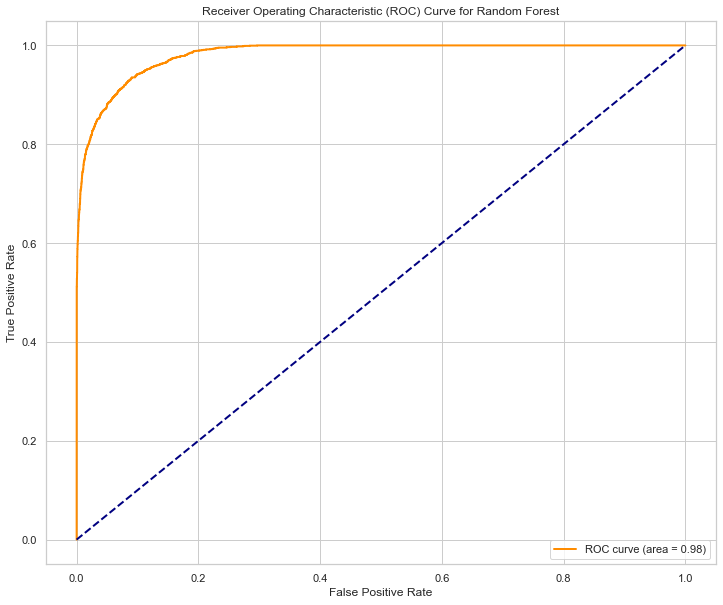

In [124]:
loan_data['loan_intent_grouped'] = loan_data['loan_intent'].replace({
    'PERSONAL': 'Personal/Improvement',
    'HOMEIMPROVEMENT': 'Personal/Improvement',
    'EDUCATION': 'Education/Medical',
    'MEDICAL': 'Education/Medical',
    'DEBTCONSOLIDATION': 'Debt Consolidation',
    'VENTURE': 'Business/Venture'
})

# One-hot encode the newly grouped 'loan_intent_grouped'
loan_intent_grouped_encoded = pd.get_dummies(loan_data['loan_intent_grouped'], prefix='loan_intent_grouped')

# Drop original 'loan_intent' and 'loan_intent_grouped' columns
loan_data = loan_data.drop(columns=['loan_intent', 'loan_intent_grouped'])

# Concatenate the encoded grouped columns with the original dataframe
loan_data_final = pd.concat([loan_data, loan_intent_grouped_encoded], axis=1)

# Encode other categorical columns (if needed)
categorical_columns = loan_data_final.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(loan_data_final[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Remove original categorical columns and combine with encoded data
loan_data_final = loan_data_final.drop(columns=categorical_columns).reset_index(drop=True)
loan_data_final = pd.concat([loan_data_final, encoded_df], axis=1)

# Define features and target variable
X = loan_data_final.drop('loan_status', axis=1)
y = loan_data_final['loan_status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Visualize feature importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for the Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(12, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


### BEST MODEL

Our model accuracy of 94.14% is an improvement from that of the LogisticRegression and the Random Forests's. As such, we know that when we group bine based on a specific feature, in this case loan_intent, we know the accuracy of predictions increases. We also have an improvement in precison, recall, and F-1 scores. These all mean that the model can effectively discriminate between defaults and non-defaults.

### Next Steps:
Lets see what happens to our accuracy of predictions between loan defaults and non-defualts if we limit features that are possible related to each other, which in this case would be limiting to only loan_intent, previous_loan_defaults_on_file, person_education.

In [138]:
# Filter only the necessary columns for fine-tuning
fine_tune_columns = ['loan_intent', 'previous_loan_defaults_on_file', 'person_education', 'loan_status']
loan_data_fine_tune = loan_data[fine_tune_columns]

# Apply one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(loan_data_fine_tune[['loan_intent', 'previous_loan_defaults_on_file', 'person_education']])
encoded_columns = encoder.get_feature_names_out(['loan_intent', 'previous_loan_defaults_on_file', 'person_education'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Add the target variable
encoded_df['loan_status'] = loan_data_fine_tune['loan_status'].reset_index(drop=True)

# Define features and target variable
X = encoded_df.drop('loan_status', axis=1)
y = encoded_df['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest model
rf_model_fine_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model_fine_tuned.fit(X_train, y_train)

# Predict on the test set
y_pred_fine_tuned = rf_model_fine_tuned.predict(X_test)

# Evaluate model performance
accuracy_fine_tuned = accuracy_score(y_test, y_pred_fine_tuned)
conf_matrix_fine_tuned = confusion_matrix(y_test, y_pred_fine_tuned)
classification_rep_fine_tuned = classification_report(y_test, y_pred_fine_tuned)

# Display results
print("Accuracy:", accuracy_fine_tuned)
print("Confusion Matrix:\n", conf_matrix_fine_tuned)
print("Classification Report:\n", classification_rep_fine_tuned)


Accuracy: 0.7926666666666666
Confusion Matrix:
 [[6204  786]
 [1080  930]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      6990
           1       0.54      0.46      0.50      2010

    accuracy                           0.79      9000
   macro avg       0.70      0.68      0.68      9000
weighted avg       0.78      0.79      0.79      9000



We see that when we limit our features to only loan_intent, previous_loan_defaults_on_file, person_education, the accuracy of our predictions decreases to 79.27%. However, the model still achieves a reasonably high recall and precision. But when we compare it to the previous model we had before this where we did group based bining on loan intent, that is our best model.